# Intro. to Snorkel: Extracting Spouse Relations from the News

## Part I: Preprocessing

In this tutorial, we will walk through the process of using `Snorkel` to identify mentions of spouses in a corpus of news articles. The tutorial is broken up into 5 notebooks, each covering a step in the pipeline:
1. Preprocessing
2. Candidate Extraction
3. Annotating Evaluation Data
4. Featurization & Training
5. Evaluation

In this notebook, we preprocess several documents using `Snorkel` utilities, parsing them into a simple hierarchy of component parts of our input data, which we refer to as _contexts_. We also extract standard linguistic features from each context which will be useful downstream using [CoreNLP](http://stanfordnlp.github.io/CoreNLP/), 

All of this preprocessed input data is saved to a database.  (Connection strings can be specified by setting the `SNORKELDB` environment variable.  In Snorkel, if no database is specified, then a SQLite database at `./snorkel.db` is created by default--so no setup is needed here!

### Initializing a `SnorkelSession`

First, we initialize a `SnorkelSession`, which will enable us to save intermediate results.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from snorkel import SnorkelSession
session = SnorkelSession()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the `Corpus`

Next, we load and pre-process the corpus, storing it for convenience in a `Corpus` object.

### Unarchive the Data

In [2]:
import os
os.system('cd data; tar -xzvf data.tar.gz')

0

### Configuring a `DocParser`

We'll start by defining a `TSVDocParser` class to read in the documents, which are stored in a tab-seperated value format as pairs of document names and text.

In [3]:
from snorkel.parser import TSVDocParser
doc_parser = TSVDocParser(path='data/articles-train.tsv')

### Creating a `SentenceParser`

Next, we'll use an NLP preprocessing tool to split the `Document` objects into sentences, tokens, and provide annotations--part-of-speech tags, dependency parse structure, lemmatized word forms, etc.--for these sentences.  Here we use the default `SentenceParser` class.

In [4]:
from snorkel.parser import SentenceParser

sent_parser = SentenceParser()

### Pre-processing & loading the `Corpus`

Finally, we'll put this all together using a `CorpusParser` object, which will execute the parsers and store the results as a `Corpus`:

SKIPPED A MALFORMED SENTENCE!
SKIPPED A MALFORMED SENTENCE!
SKIPPED A MALFORMED SENTENCE!
Number of documents: 900
CPU times: user 42.7 s, sys: 3.9 s, total: 46.6 s
Wall time: 8min 55s


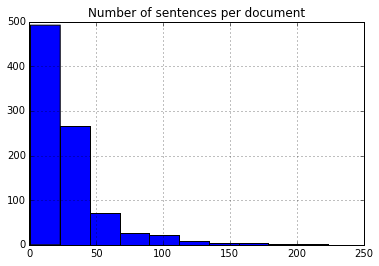

In [5]:
from snorkel.parser import CorpusParser

cp = CorpusParser(doc_parser, sent_parser)
%time corpus = cp.parse_corpus(session, 'News Training')

Note that the printed stats are a property of the `Corpus` object, and can be printed again via the `corpus.stats()` method!

In [6]:
doc = corpus.documents[0]
doc

Document c5cca59e-de49-487a-8324-4474beafd522

In [7]:
sent = doc.sentences[0]
print unicode(sent)
print unicode(sent.words)
print sent.pos_tags

Sentence(Document c5cca59e-de49-487a-8324-4474beafd522, 0, u'Just before the sun came up on Tuesday, Blue Gum Farm at Euroa \u2013 like all stud farms across the country \u2013 was bracing itself for newborn foals and pregnant mares.')
[u'Just', u'before', u'the', u'sun', u'came', u'up', u'on', u'Tuesday', u',', u'Blue', u'Gum', u'Farm', u'at', u'Euroa', u'--', u'like', u'all', u'stud', u'farms', u'across', u'the', u'country', u'--', u'was', u'bracing', u'itself', u'for', u'newborn', u'foals', u'and', u'pregnant', u'mares', u'.']
[u'RB', u'IN', u'DT', u'NN', u'VBD', u'RP', u'IN', u'NNP', u',', u'NNP', u'NNP', u'NNP', u'IN', u'NNP', u':', u'IN', u'DT', u'NN', u'NNS', u'IN', u'DT', u'NN', u':', u'VBD', u'VBG', u'PRP', u'IN', u'JJ', u'NNS', u'CC', u'JJ', u'NNS', u'.']


### Saving the `Corpus`
Finally, we persist the parsed corpus in Snorkel's database backend:

In [8]:
session.add(corpus)
session.commit()

### Repeating for development and test corpora
We will rerun the same operations for the other two News corpora: development and test. All we do is change the path that the `TSVDocParser` uses.

Number of documents: 50
CPU times: user 2.21 s, sys: 111 ms, total: 2.32 s
Wall time: 28.3 s
Number of documents: 50
CPU times: user 2.12 s, sys: 112 ms, total: 2.23 s
Wall time: 25.5 s


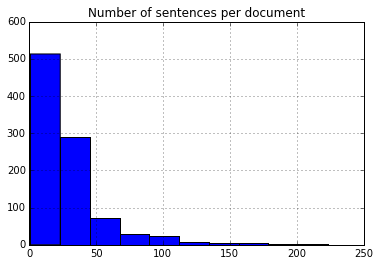

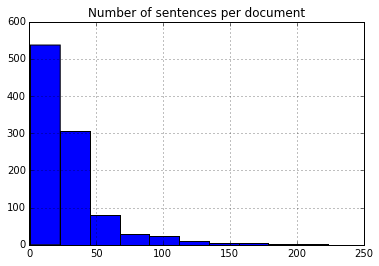

In [9]:
for name, path in [('News Development', 'data/articles-dev.tsv'),
                   ('News Test', 'data/articles-test.tsv')]:
    doc_parser.path=path
    %time corpus = cp.parse_corpus(session, name)
    session.commit()

Next, in Part 2, we will look at how to extract `Candidate` relations from our saved `Corpus`.

In [10]:
## This cell is just for speeding up automatic testing. You can safely ignore it!
import os
if 'CI' in os.environ:
    from snorkel.models import Corpus
    import random
    for corpus_name in ['News Training']:
        corpus = session.query(Corpus).filter(Corpus.name == corpus_name).one()
        docs = set([d for d in corpus.documents])
        for doc in docs:
            if random.random() > .10:
                corpus.remove(doc)
    session.commit()